# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


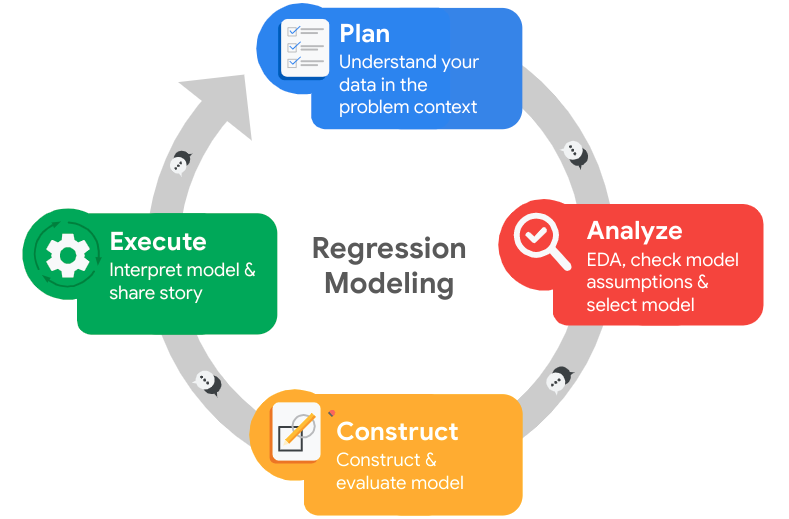

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
    - The primary audience for this project is the senior leadership team at Salifort Motors, including the CEO, HR department heads, and other key decision-makers. Additionally, the project may be of interest to HR professionals, data analysts, and data scientists within the organization who seek to address the issue of high employee turnover.
* What are you trying to solve or accomplish?
    - The main problem this project aims to solve is the high rate of employee turnover at Salifort Motors. This includes employees who voluntarily leave their positions and those who are let go. The project seeks to accomplish the following:
        - Build a Predictive Model: Develop a predictive model that can forecast whether an employee is likely to leave the company based on various attributes such as job title, department, number of projects, average monthly hours, and more.
        - Identify Key Factors: Uncover and analyze the key factors driving employee turnover within the organization. Understanding the root causes is crucial for addressing the issue effectively.
        - Provide Insights and Recommendations: Offer actionable insights and recommendations based on the analysis to improve employee retention, reduce turnover costs, and foster a more supportive corporate culture.
        - Anticipated Impact: The anticipated impact of this work on the larger business need is as follows:
            - Improved Employee Retention: By accurately predicting employee departures and identifying contributing factors, Salifort Motors can take proactive measures to retain valuable talent, thereby fostering a more stable and productive workforce.
            - Cost Savings: Reducing turnover rates will result in significant cost savings related to recruitment, training, and employee onboarding.
            - Enhanced Corporate Culture: Addressing turnover issues can lead to an improved corporate culture that supports employee success and professional development, making Salifort Motors a more attractive workplace.

- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage?
    - Data: Access to the HR_capstone_dataset.csv containing employee information.
    - Computational Resources: Adequate computing power and software tools for data analysis, model building, and evaluation.
    - Data Analysis Tools: Python programming language, libraries such as pandas, scikit-learn, and XGBoost, Jupyter notebooks, and data visualization tools.
    - Project Team: Data professionals, data analysts, and data scientists with expertise in data analysis and machine learning.
    - Time: Sufficient time to perform data analysis, model building, and evaluation, as well as prepare deliverables.

- Do you have any ethical considerations in this stage?
    - In this stage of data exploration, it's essential to consider ethical considerations such as:
        - Privacy: Ensure that the data used in the analysis is anonymized and does not contain any personally identifiable information (PII) of employees.
        - Fairness: Be cautious of potential bias in the data or analysis that could disproportionately affect certain groups of employees.
        - Transparency: Maintain transparency in the data processing and analysis steps, and clearly document any data transformations or cleaning performed.
        - Additionally, as the project progresses, it's important to be mindful of ethical considerations related to the use of predictive models in making decisions about employee retention, promotions, or other HR-related matters. Ensure that these models are fair, unbiased, and used responsibly to benefit both the organization and its employees.




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [40]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

The dataset contains 3008 duplicated data that is approx 20% of the sample

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


It's very unlike that employees have the same float numbers in each column and also the same integer numbers for all columns. So we will drop the duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

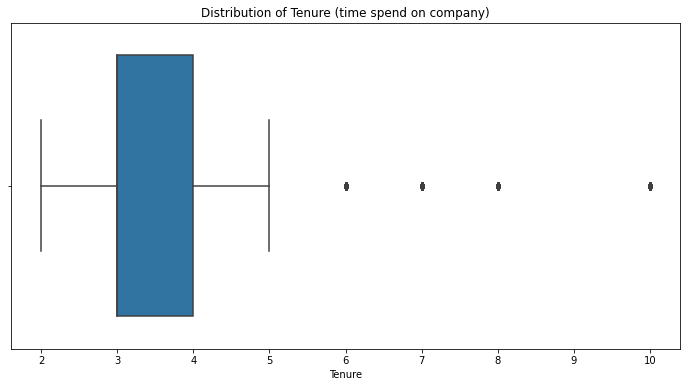

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (12, 6))
sns.boxplot(data = df0, x = 'time_spend_company')
plt.xlabel('Tenure')
plt.ylabel('')
plt.title('Distribution of Tenure (time spend on company)')
plt.show()


In [12]:
# Determine the number of rows containing outliers
percentile25 = df1['time_spend_company'].quantile(0.25)
percentile75 = df1['time_spend_company'].quantile(0.75)
iqr = percentile75 - percentile25
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]
len(outliers)

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

# Get percentages of people who left vs. stayed
df1['left'].value_counts() / df1['left'].shape[0]


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

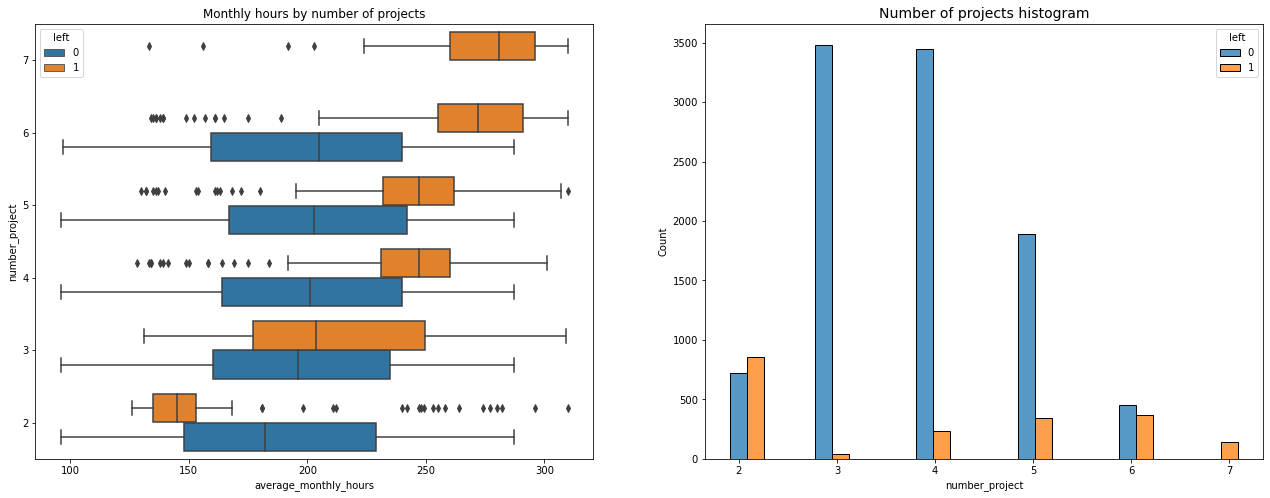

In [14]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22, 8))
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Number of projects histogram', fontsize = 14)
plt.show()


The observed patterns in the data suggest some noteworthy insights. It appears natural that individuals who are involved in more projects tend to dedicate more hours to their work. This trend is evident, as the mean working hours increase alongside the number of projects.

However, a few distinct observations emerge from the data:

1. **Two Groups of Departing Employees:** There are two distinct groups among employees who left the company. Group A consists of those who worked significantly fewer hours compared to their peers with the same number of projects, possibly indicating terminations or employees who had already resigned. Group B includes individuals who worked considerably more hours, likely reflecting voluntary departures. These individuals may have been significant contributors to their projects.

2. **Universal Departure at Seven Projects:** All employees with seven projects left the company. Additionally, those who left with six projects had similar working hour ranges, significantly higher than other groups.

3. **Optimal Project Count:** Employees who stayed generally seem to maintain a work-life balance, with the ideal number of projects appearing to be in the range of 3–4. The ratio of those who left to those who stayed is notably smaller for these cohorts.

4. **Possible Overwork:** Assuming a standard 40-hour workweek and two weeks of annual vacation, the average monthly working hours for employees working Monday to Friday would be approximately 166.67 hours. Remarkably, every group, except those with two projects, exceeded this average. This suggests a potential issue of overwork among employees, even for those who remained with the company.

In summary, the data analysis reveals varying work-hour patterns among employees who left the company, with indications of both terminations and voluntary departures. The ideal project count for employee retention appears to be 3–4. Furthermore, the data raises concerns about potential overworking, as most groups surpass the expected monthly working hours.

In [15]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

### Average monthly hours by satisfation

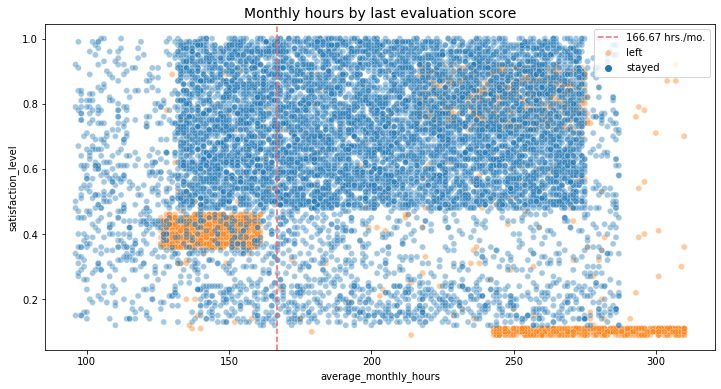

In [16]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


1. **Moderate Working Hours and Satisfaction:** The first group comprised individuals working approximately 130 to 160 hours per month, and they reported low satisfaction levels around 0.4. Probably this are dismotivated employees who had been cuted from the company by a HR mass dimissing of employees that don't follow the company hard work culture.

2. **High Working Hours Company Culture:** The second group significant portion of employees fell within the range of approximately 130–290 hours per month. They present a moderate to high satisfaction level. They stayed in the company except for another inside block between 210 and 290 working hours and with high satisfaction. Probably this employees left the company because of churn to another company.

3. **High Working Hours and Left:** The last group significant portion of employees fell within the range of approximately 240–315 hours per month. Remarkably, 315 hours per month equate to over 75 hours per week for an entire year. This group's exceptionally high working hours appear to be associated with notably low satisfaction levels, almost reaching zero and high left.



### Satisfaction level by tenure

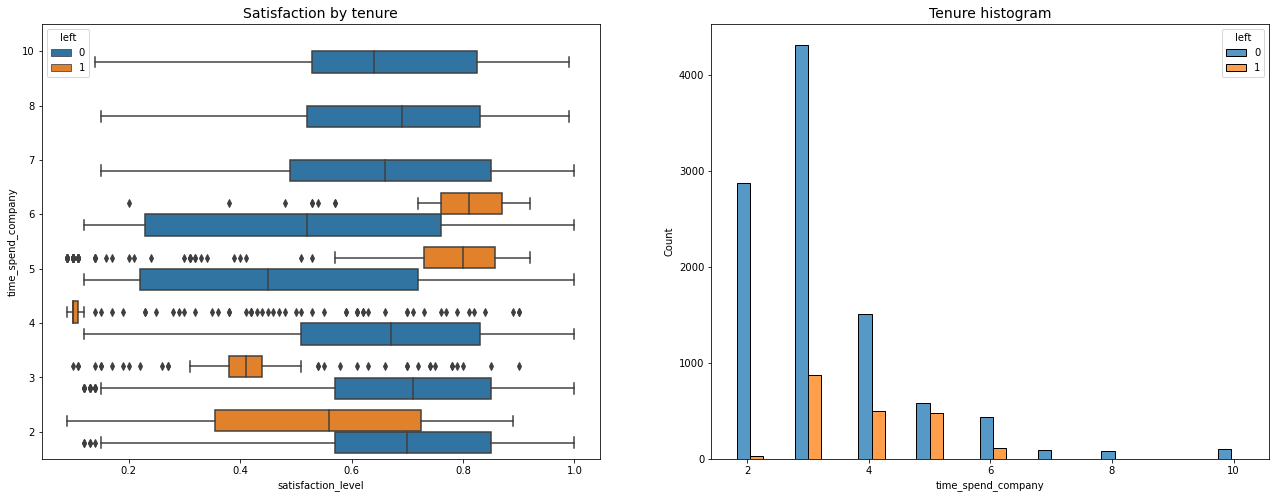

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['time_spend_company']
tenure_left = df1[df1['left']==1]['time_spend_company']
sns.histplot(data=df1, x='time_spend_company', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Analysis of employee departures reveals distinct categories:

1. **Two Departure Categories:** Departing employees can be broadly categorized into two groups. The first comprises dissatisfied employees with shorter tenures, indicating potential issues with onboarding, workplace satisfaction, or early turnover. The second group consists of highly satisfied employees with medium-length tenures, suggesting that factors other than satisfaction contribute to their departure.

2. **Four-Year Employee Anomaly:** Notably, employees with four years of tenure who left the company displayed an exceptionally low level of satisfaction. This finding raises questions about specific company policies or changes that may have impacted employees around the four-year mark. Investigating these factors could yield insights into retention strategies.

3. **Longest-Tenured Employee Retention:** The employees with the longest tenures remained with the company, and their satisfaction levels resembled those of newer employees who stayed. This suggests that factors contributing to job satisfaction and retention may differ for longer-tenured employees.

4. **Tenure Distribution:** The histogram highlights a relatively small number of longer-tenured employees. It is plausible that this group represents higher-ranking and higher-paid individuals within the organization, which could explain their extended tenures.

In summary, analyzing employee departures reveals patterns of dissatisfaction among shorter-tenured employees and anomalies among those with four years of tenure. Further exploration of the experiences and policies related to the four-year mark may uncover valuable insights for retention strategies. Additionally, considering the tenure distribution provides context for understanding the composition of the workforce.

### Mean and median satisfaction by turn over

In [18]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

### Salary levels by tenure

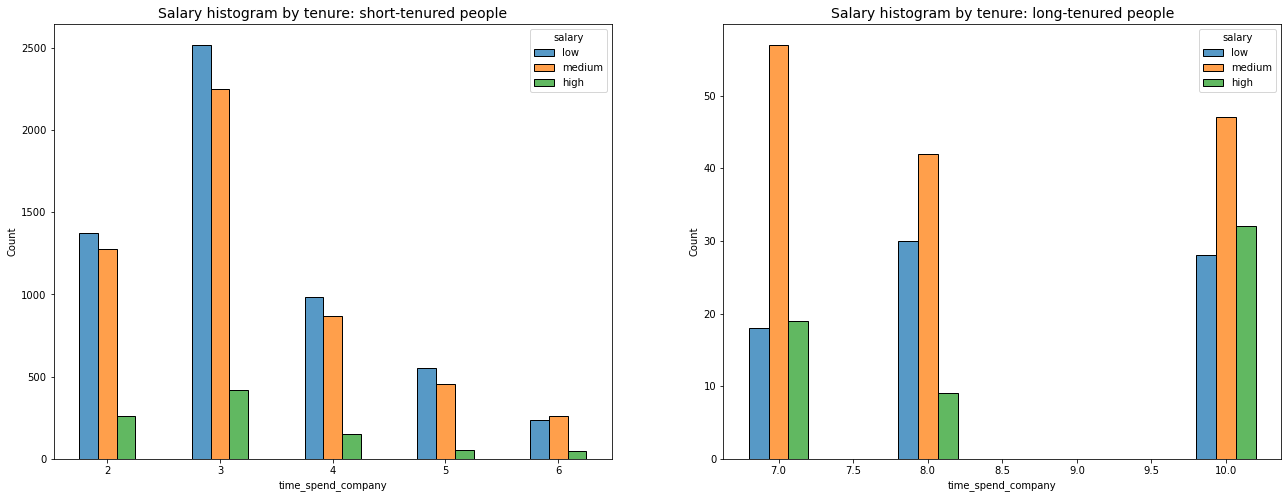

In [19]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['time_spend_company'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['time_spend_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

### Evaluation and average monthly hours

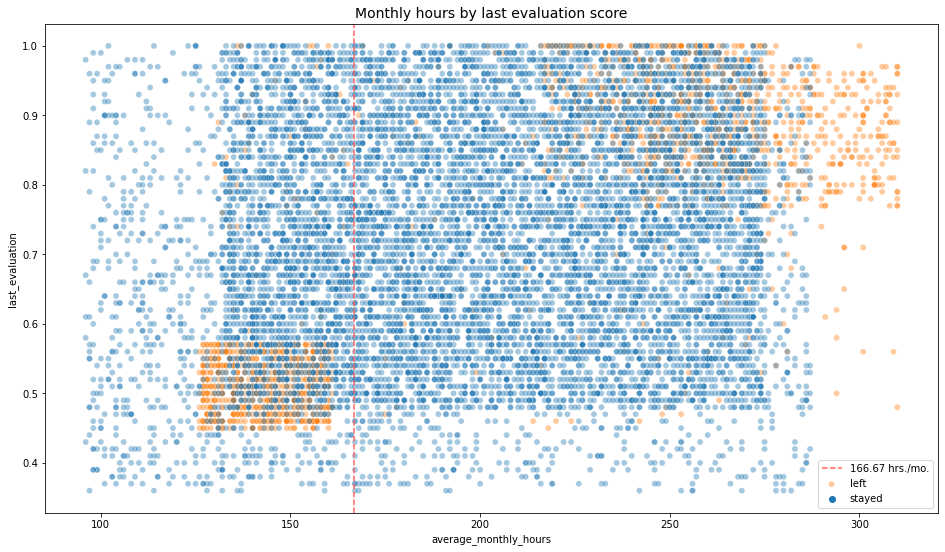

In [20]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The scatterplot above reveals several notable observations:

1. **Two Departure Groups:** Departing employees can be divided into two distinct groups. The first group comprises overworked employees who consistently performed very well. The second group consists of employees who worked slightly below the nominal monthly average of 166.67 hours and received lower evaluation scores.

2. **Hours Worked and Evaluation Score Correlation:** A discernible correlation exists between the number of hours worked per month and employees' evaluation scores. Generally, as working hours increase, evaluation scores tend to rise as well.

3. **Limited Presence in Upper Left Quadrant:** The plot does not show a high percentage of employees in the upper left quadrant, suggesting that working long hours does not guarantee a good evaluation score. Other factors likely influence performance and evaluation outcomes.

4. **Extended Working Hours:** The majority of employees in the company consistently work well above the standard 166.67 hours per month, indicating a prevailing pattern of extended working hours among the workforce.

In summary, the scatterplot highlights the presence of two distinct groups among departing employees, the correlation between working hours and evaluation scores, and the prevalence of extended working hours among the company's workforce. Additionally, it suggests that employee performance and evaluation outcomes depend on multiple factors beyond just working hours.

### Average working hours vs promotion last 5 years

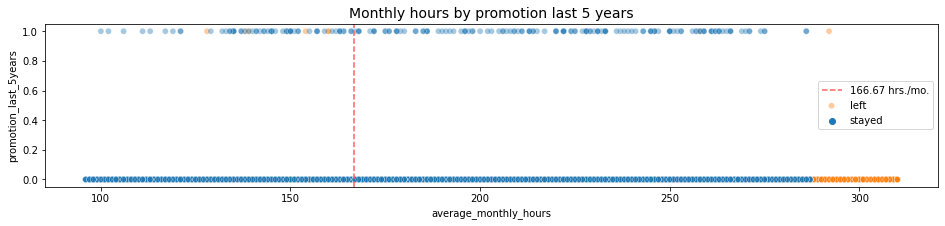

In [21]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


Employees that work more then has an average of monthly hours worked greater then 290 and didn't received a promotion in the last 5 year are more likely leave the company

### Departures across departments

In [23]:
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

There's a much higher number of employees in departments like sales, technical and support.

In [28]:
df1.groupby('department')['left'].sum().sort_values(ascending = False)

department
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: left, dtype: int64

The sales department, techinical and support leads the number of employees that leaved the company.

In [27]:
df1.groupby('department')['left'].mean().sort_values(ascending = False)

department
hr             0.188020
accounting     0.175523
technical      0.173797
support        0.171334
sales          0.169805
marketing      0.166419
IT             0.161885
product_mng    0.160350
RandD          0.122478
management     0.119266
Name: left, dtype: float64

There's a higher proprotion of employees leaving the company the departments hr, accounting and technical. But the proportions seens to be evenly distributed except for management and RandD having lower proportions of left employees.

### Counts of stayed vs left 

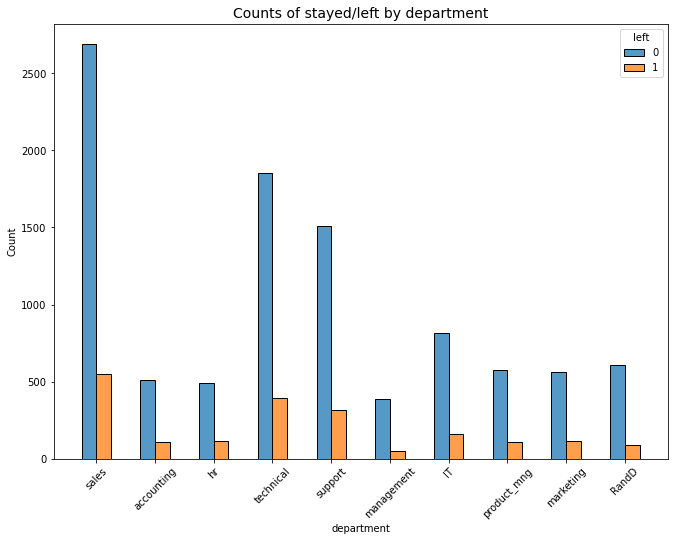

In [29]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

The bar plot show that besides sales, technical and support had higher counts of left employees, they also has much more employees. Because of that this departments have a smaller proportion of left.

### Correlation between variables

Text(0.5, 1.0, 'Heat map of correlation between variables')

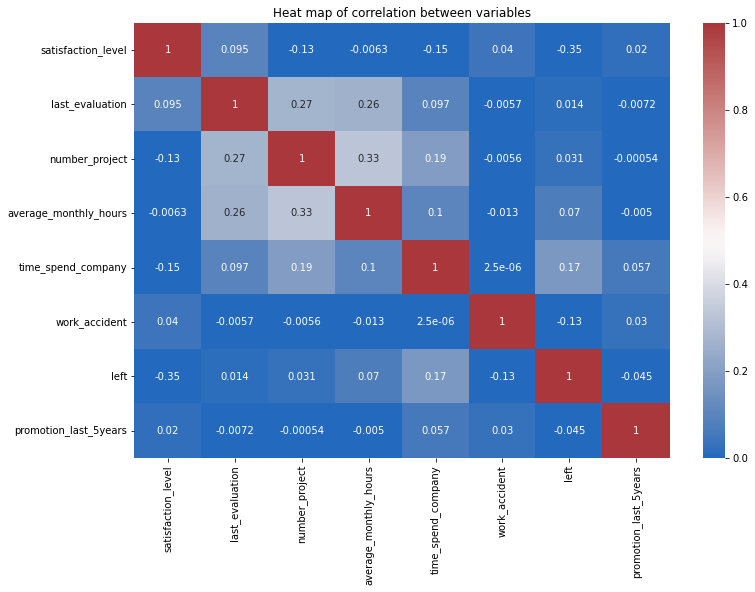

In [36]:
plt.figure(figsize = (12, 8))
sns.heatmap(df1.corr(), vmin = 0, vmax = 1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Heat map of correlation between variables')

To analyze the correlation matrix and detect multicollinearity with the target variable "left," we can focus on the correlations between "left" and the other variables in the dataset. Additionally, we should pay attention to high correlations between independent variables (multicollinearity), as this can affect the reliability of predictive models. Let's break down the key findings:

1. **Correlation with the Target Variable "left":**
   - "satisfaction_level" has a strong negative correlation with "left" (-0.350558), indicating that as employee satisfaction decreases, the likelihood of leaving the company increases. This is a significant predictor of employee turnover.
   - "last_evaluation" and "number_project" have relatively weak positive correlations with "left" (0.013520 and 0.030928, respectively), suggesting that higher evaluation scores and involvement in more projects are associated with a slightly increased likelihood of leaving the company.
   - "average_monthly_hours" has a positive correlation with "left" (0.070409), indicating that employees who work longer hours tend to have a slightly higher chance of leaving.
   - "time_spend_company" has a positive correlation with "left" (0.173295), suggesting that as employees spend more time with the company, the likelihood of leaving increases. This variable may indicate turnover risk for long-tenured employees.
   - "work_accident" has a negative correlation with "left" (-0.125436), implying that employees who have experienced a work accident are less likely to leave the company.
   - "promotion_last_5years" has a negative correlation with "left" (-0.044657), suggesting that employees who received a promotion in the last 5 years are less likely to leave.

2. **Multicollinearity Between Independent Variables:**
   - "number_project" and "average_monthly_hours" have a moderate positive correlation (0.331516), indicating that employees working on more projects tend to have longer working hours. This is a potential source of multicollinearity.
   - "time_spend_company" and "number_project" have a positive correlation (0.188837), suggesting that employees with more tenure may be involved in more projects, which could also contribute to multicollinearity.
   - There are no extremely high correlations (close to 1) between independent variables, which is generally a good sign for avoiding severe multicollinearity issues.

In summary, the analysis of the correlation matrix reveals several relationships between independent variables and the target variable "left." "Satisfaction_level" appears to be the most influential predictor, followed by "time_spend_company." Some moderate correlations between independent variables may warrant further consideration in model building to avoid multicollinearity-related problems.

### Insights

The analysis suggests that employee departures from the company are associated with factors that point toward potential issues in management and work-life balance:

1. **Management and Workload Impact:** Employees who leave the company tend to exhibit characteristics such as longer working hours, involvement in multiple projects, and generally lower levels of job satisfaction. This combination suggests a connection between employee departures and potential challenges in management and workload distribution.

2. **Job Dissatisfaction and Overwork:** The data indicates that working long hours without corresponding promotions or favorable evaluation scores can lead to dissatisfaction among employees. This situation, in which employees may feel overworked and unrewarded, likely contributes to their decisions to leave.

3. **Burnout Risk:** There is a notable group of employees within the organization who may be experiencing burnout due to the demands of their work. The combination of long working hours, high project involvement, and lower satisfaction levels suggests a risk of burnout among this segment of the workforce.

4. **Employee Tenure:** Interestingly, the analysis reveals that employees who have spent more than six years at the company tend to have lower departure rates. This suggests that longer tenure might be associated with increased job stability and loyalty to the organization.

In summary, the data hints at a connection between employee departures and factors related to management practices, workload, and job satisfaction. Addressing these issues could be essential in retaining employees and fostering a healthier work environment. Additionally, the longer tenure of certain employees suggests that retaining experienced staff members may be beneficial for the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is to indentify customers that have risk left the company. The target variable is the left column of the data frame. This columns has the values 1 for employees that left the company and 0 for employees that stayed in the company.

### Identify the types of models most appropriate for this task.

The most appropriate model for a binary classification problem is a logistic regression or a tree based model. Other models like vector suport machines are also possible.

### Modeling

The first step on modelign is to encod categorical variables>


In [37]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Encode categorical variables

In [38]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Remove ouliers

In [39]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['time_spend_company'] >= lower_limit) & (df_enc['time_spend_company'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Isolate the target and features variables and split

In [41]:
# Isolate the outcome variable
y = df_logreg['left']

# Isolate the features
X = df_logreg.drop('left', axis=1)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Logistic Regression

In [42]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


In [43]:
# Predictions on the test set
y_pred = log_clf.predict(X_test)

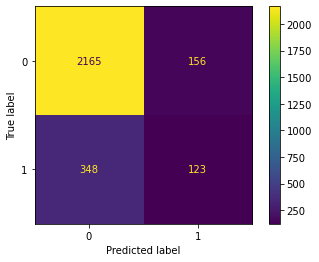

In [44]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In the context of a confusion matrix, the different quadrants represent the following:

- **Upper-Left Quadrant:** This quadrant represents the number of true negatives. These are cases where the model accurately predicted that individuals did not leave, and in reality, they did not leave the company.

- **Upper-Right Quadrant:** This quadrant represents the number of false positives. These are cases where the model incorrectly predicted that individuals left (positive prediction), but in reality, they did not leave (negative outcome).

- **Bottom-Left Quadrant:** This quadrant represents the number of false negatives. These are cases where the model incorrectly predicted that individuals did not leave (negative prediction), but in reality, they did leave (positive outcome).

- **Bottom-Right Quadrant:** This quadrant represents the number of true positives. These are cases where the model accurately predicted that individuals left, and in reality, they did leave the company.

In the context of binary classification, such as predicting employee turnover, these metrics help evaluate the performance of a predictive model:

- **True Negatives (TN):** Individuals correctly classified as not leaving.
- **False Positives (FP):** Individuals incorrectly classified as leaving when they actually did not.
- **False Negatives (FN):** Individuals incorrectly classified as not leaving when they actually did.
- **True Positives (TP):** Individuals correctly classified as leaving.

A perfect model would have all true negatives and true positives (accurate predictions) and no false negatives or false positives (inaccurate predictions). However, in practice, there is often a trade-off between these metrics, and the goal is to balance them to achieve the best overall model performance.

### Classification report

In [45]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Considering the class imbalance in the dataset is crucial for a more comprehensive evaluation of the model's performance. In this case, there is a significant class imbalance, with approximately 83.15% of employees staying (class 0) and only about 16.85% of employees leaving (class 1). Let's interpret the classification scores in light of this class imbalance:

1. **Precision and Recall for "Predicted would not leave" (Class 0):**
   - Precision: 0.86
   - Recall: 0.93

   - Precision for employees predicted to stay is 86%. This means that when the model predicts that an employee will stay, it is correct 86% of the time.
   - Recall for employees who actually stayed is 93%. This indicates that the model captures 93% of employees who actually stayed.

   - High precision suggests that when the model predicts an employee will stay, it's highly accurate. High recall indicates that the model effectively identifies the majority of actual stay cases.

2. **Precision and Recall for "Predicted would leave" (Class 1):**
   - Precision: 0.44
   - Recall: 0.26

   - Precision for employees predicted to leave is 44%. This means that when the model predicts that an employee will leave, it is correct 44% of the time.
   - Recall for employees who actually left is 26%. This indicates that the model captures only 26% of employees who actually left.

   - The lower precision and recall for predicting employee departures suggest that the model struggles more with this class, which is the minority class.

3. **F1-Score for "Predicted would leave" (Class 1):**
   - F1-Score: 0.33

   - The F1-score for predicting employees who would leave is 0.33, indicating a moderate balance between precision and recall for this class.

4. **Accuracy and Imbalanced Classes:**
   - The overall accuracy of the model is 82%. However, due to the class imbalance, a high accuracy can be achieved by correctly predicting the majority class (employees staying) while still having room for improvement in correctly identifying the minority class (employees leaving).

5. **Class Imbalance Consideration:**
   - It's important to note that the model's performance on the minority class (employees leaving) is weaker, as reflected in the lower precision and recall values. In imbalanced datasets, achieving high accuracy can be misleading because the model may perform well on the majority class while neglecting the minority class.

In summary, while the model demonstrates good performance in predicting employees who would stay, there is room for improvement in correctly identifying employees who would leave, especially considering the significant class imbalance. Balancing precision and recall for both classes, particularly the minority class, is essential for enhancing the model's utility in identifying employees at risk of leaving.

### Decision tree and random forest

In [46]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [47]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.72 s, sys: 0 ns, total: 2.72 s
Wall time: 2.72 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [48]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [49]:
tree1.best_score_

0.9738070859906354

In [51]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [52]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.959115,0.912839,0.935275,0.978747,0.973807


All of these scores from the decision tree model are strong indicators of good model performance.

### Random Forest

In [53]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [54]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 8min 47s, sys: 0 ns, total: 8min 47s
Wall time: 8min 47s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [58]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [59]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [60]:
write_pickle(path, rf1, 'hr_rf1')

In [61]:
rf1 = read_pickle(path, 'hr_rf1')

In [62]:
# Check best AUC score on CV
rf1.best_score_

0.9801962654493814

In [63]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [64]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.959115  0.912839  0.935275  0.978747  0.973807
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.968225  0.908588  0.937377  0.979583  0.980196


The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model mostly outperforms the decision tree model.

In [65]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [66]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.982063,0.929936,0.955289,0.985315,0.963245


The test scores closely mirror the validation scores, indicating that the model's performance is consistent between the two datasets. This is a positive sign, suggesting that the model's generalization ability is robust. Since the test set was exclusively reserved for evaluating this specific model and not used during the model's training or validation phases, there is a higher level of confidence that the model's performance on this test data is indicative of how it will perform when applied to entirely new, unseen data. This reinforces the model's reliability and its potential to make accurate predictions on real-world, out-of-sample data.

### Feature Engineer

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [67]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2 = df_enc.drop('satisfaction_level', axis=1)
df2['overworked'] = df2['average_monthly_hours']

df2.head()

,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,262
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [68]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [69]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [72]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [73]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree

In [74]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [75]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.25 s, sys: 0 ns, total: 2.25 s
Wall time: 2.25 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [76]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [77]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

The model performs weel even without the satisfaction score.

In [78]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.959115  0.912839  0.935275  0.978747  0.973807
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

### Random Forest

In [79]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [80]:
%%time
rf2.fit(X_train, y_train) 

CPU times: user 6min 52s, sys: 0 ns, total: 6min 52s
Wall time: 6min 52s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
# Check best params
rf2.best_params_

In [ ]:
# Check best AUC score on CV
rf2.best_score_

In [ ]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

In [ ]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

This seems to be a stable, well-performing final model. 

Plot a confusion matrix to visualize how well it predicts on the test set.

Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. 


In [ ]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

In [ ]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance


In [ ]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

In [ ]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### Random Forest feature importance

In [ ]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression:**
- Precision: 80%
- Recall: 83%
- F1-Score: 80% (weighted average)
- Accuracy: 83%

**Tree-Based Machine Learning (Decision Tree):**
- AUC: 93.8%
- Precision: 87.0%
- Recall: 90.4%
- F1-Score: 88.7%
- Accuracy: 96.2%

After conducting feature engineering, the decision tree model achieved notably high performance metrics on the test set. It demonstrated an AUC of 93.8%, indicating strong discrimination ability. The precision, recall, and F1-score all exceeded 87%, showcasing the model's effectiveness in correctly classifying employees who left the company. Moreover, the model achieved an impressive accuracy rate of 96.2%.

The random forest model, which is an ensemble of decision trees, performed slightly better than the individual decision tree model. These results indicate that the tree-based machine learning approach, especially the random forest, excelled in predicting employee turnover, outperforming the logistic regression model.

### Conclusion, Recommendations, Next Steps

The analysis conducted using the models and feature importances has highlighted a critical issue within the company—employee overwork. To address this concern and improve employee retention, several recommendations can be presented to the stakeholders:

1. **Cap the Number of Projects:** Consider implementing a maximum limit on the number of projects that employees can work on simultaneously. This can help reduce the workload burden and prevent burnout.

2. **Address Four-Year Employee Dissatisfaction:** Investigate the reasons behind the dissatisfaction among employees with four years of tenure. This could involve conducting surveys or interviews to understand their specific concerns and taking steps to address them.

3. **Reward or Adjust Working Hours:** Evaluate the possibility of rewarding employees who work longer hours or consider adjusting workload expectations to create a healthier work-life balance.

4. **Clarify Overtime Policies:** Ensure that employees are well-informed about the company's overtime pay policies and expectations regarding workload and time off. Clear communication can reduce ambiguity and stress.

5. **Foster Discussions and Culture Change:** Initiate company-wide and team-specific discussions to understand and address the company's work culture. Identify areas where improvements can be made to support employee well-being and job satisfaction.

6. **Reevaluate Evaluation Scores:** Review the criteria for high evaluation scores and consider implementing a proportionate scale that rewards employees based on their contributions and efforts rather than solely on working excessive hours.

**Next Steps:**

1. **Data Leakage Consideration:** There may still be concerns about potential data leakage. It's advisable to assess how model predictions change when the feature `last_evaluation` is removed from the data. This step can help determine whether evaluations significantly impact employee retention predictions.

2. **Exploration of Other Predictors:** Explore the possibility of predicting employee retention without relying on `last_evaluation`. Investigate whether other factors such as performance scores or satisfaction scores could be more influential in predicting employee departures.

3. **Future Project Idea - K-Means Analysis:** Consider undertaking a future project involving the application of K-means clustering on the employee data. This approach can provide valuable insights by grouping employees into clusters based on shared characteristics, potentially revealing patterns and areas for improvement in employee management and retention strategies.### Conclusion, Recommendations, Next Steps


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.